In [73]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import missingno as msno
import datetime
import tensorflow as tf
import tensorflow
import collections
from collections import defaultdict
from shutil import copy
from shutil import copytree, rmtree
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
from keras.applications import MobileNetV2
import cv2
import math
from tensorflow.keras.initializers import he_uniform, glorot_uniform
import joblib
import pickle
import time
from IPython.display import Image

In [74]:
%cd D:\mysask\AI\food-101\food-101

D:\mysask\AI\food-101\food-101


In [75]:
print("Classes of food items:\n\n")
os.listdir('D:\\mysask\\AI\\food-101\\food-101\\images')

Classes of food items:




['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [76]:
# Function to re-arrange the dataset
def rearrange_data(filepath, source, destination):
    ''' This function prepares train & test data & puts it into respective folders '''

    print("\nPreparing the required data...")
    classes = defaultdict(list)
    with open(filepath, 'r') as fp:
        paths = [read.strip() for read in fp.readlines()]
        print("\nLooking into food items...")
        for path in paths:
            food_item = path.split('/')
            classes[food_item[0]].append(food_item[1] + '.jpg')

    print("\nCopying the required data into folders...")
    for food_item in classes.keys():
        if not os.path.exists(os.path.join(destination, food_item)):
            os.makedirs(os.path.join(destination, food_item))
        for item in classes[food_item]:
            copy(os.path.join(source, food_item, item),
                 os.path.join(destination, food_item, item))

    print("\nDone!")
    # create training data
print("Creating our train data...")
rearrange_data('D:\\mysask\\AI\\food-101\\food-101\\meta\\train.txt',
               'D:\\mysask\\AI\\food-101\\food-101\\images', 'train')

Creating our train data...

Preparing the required data...

Looking into food items...

Copying the required data into folders...

Done!


In [77]:
%cd D:\\mysask\\AI\\food-101\\food-101\\train

print("\nTotal number of classes of images in the train folder: ")
train_samples = os.listdir()
train_files = len(train_samples)
print(train_files)

D:\mysask\AI\food-101\food-101\train

Total number of classes of images in the train folder: 
101


In [78]:
%cd D:\\mysask\\AI\\food-101\\food-101\\

D:\mysask\AI\food-101\food-101


In [79]:
# create testing data
print("Creating our test data...")
rearrange_data('D:\\mysask\\AI\\food-101\\food-101\\meta\\test.txt',
               'D:\\mysask\\AI\\food-101\\food-101\\images', 'test_data')

Creating our test data...

Preparing the required data...

Looking into food items...

Copying the required data into folders...

Done!


In [80]:
def plot_sample_images(flag):
    '''This function plots random images from train & test folders'''
    rows = 5
    cols = 4
    fig, ax = plt.subplots(rows, cols, figsize=(20, 20))

    # for plotting images in train data
    if flag == 1:       
        fig.suptitle("Sample images from train data", y=1.1, fontsize=34) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
        dir = "D:\\mysask\\AI\\food-101\\food-101\\train"
    # for plotting images in train data
    if flag == 0:       
        fig.suptitle("Sample images from test data", y=1.1, fontsize=34)
        dir = "D:\\mysask\\AI\\food-101\\food-101\\test_data"
    sorted_food_items = sorted(os.listdir(dir))
    food_id = 0
    for i in range(rows):
        for j in range(cols):
            try:
                selected_food_items = sorted_food_items[food_id] 
                food_id += 1
            except:
                break
            if selected_food_items == '.DS_Store':
                continue

            selected_images = os.listdir(os.path.join(dir, selected_food_items)) 
            random_images = np.random.choice(selected_images)
            img = plt.imread(os.path.join(dir, selected_food_items, random_images))
            ax[i][j].imshow(img)
            ax[i][j].set_title(selected_food_items, pad=10)
        
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout()

In [ ]:
# plotting sample images from train data
plot_sample_images(1)

In [ ]:
# plotting sample images from test data
plot_sample_images(0)

In [81]:
def create_sample_data(list_food_items, source, destination):
    '''This method creates a sample subset of data from train & test datasets'''
    
    print("\nPreparing...")
    if os.path.exists(destination):
        rmtree(destination)
    os.makedirs(destination)
    for item in list_food_items :
        copytree(os.path.join(source, item), os.path.join(destination, item))
    print("\nDone!")

In [82]:
list_food_items = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

In [83]:

source_train = 'train'
destination_train = 'train_new'
source_test = 'test_data'
destination_test = 'test_new'

print("Creating train data folder with new classes")
create_sample_data(list_food_items, source_train, destination_train)

print("\nCreating test data folder with new classes")
create_sample_data(list_food_items, source_test, destination_test)

Creating train data folder with new classes

Preparing...

Done!

Creating test data folder with new classes

Preparing...

Done!


In [84]:
K.clear_session()
n_classes = 101
img_width, img_height = 299, 299
train_data_dir = 'D:\\mysask\\AI\\food-101\\food-101\\train_new'
validation_data_dir = 'D:\\mysask\\AI\\food-101\\food-101\\test_new'
nb_train_samples = 2250     # 75750
nb_validation_samples = 750    # 25250
batch_size = 16

# Image Augmentation
train_datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=[.8, 1],
                    horizontal_flip=True,
                    channel_shift_range=30,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [85]:
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50

In [86]:
from torch_lr_finder import LRFinder

In [87]:
train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
test_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [88]:
train_dataset = torchvision.datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\train_new', transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\test_new/', transform=test_transforms)

In [89]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True,
                                           num_workers=4, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False,
                                          num_workers=4, pin_memory=True)

In [90]:
K.clear_session()
n_classes = 101
img_width, img_height = 299, 299
train_data_dir = 'D:\\mysask\\AI\\food-101\\food-101\\train_new'
validation_data_dir = 'D:\\mysask\\AI\\food-101\\food-101\\test_new'
nb_train_samples = 2250     # 75750
nb_validation_samples = 750    # 25250
batch_size = 16

# Image Augmentation
train_datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=[.8, 1],
                    horizontal_flip=True,
                    channel_shift_range=30,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [91]:
model_mn = MobileNetV2(weights='imagenet', include_top=False)
model_mn.trainable = False
x = model_mn.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
predictions_mn = Dense(n_classes, activation='softmax')(x)

C:\Users\fengy\AppData\Local\Temp\ipykernel_98924\115472342.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model_mn = MobileNetV2(weights='imagenet', include_top=False)


In [102]:
# 假设 model_mn 和 predictions_mn 已经定义
model_mn = Model(inputs=model_mn.input, outputs=predictions_mn)
model_mn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 更改文件路径为 .keras 格式
checkpoint = ModelCheckpoint(
    filepath='best_model_mobilenet.keras',  # 更改为 .keras 格式
    verbose=1,
    monitor='val_accuracy',
    save_best_only=True
)

csv_logger = CSVLogger('history_mobilenet.log')
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

log_dir = "D:\\mysask\\AI\\food-101\\food-101\\logs_model_mobilenet\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True
    # 移除 write_grads 参数
)

def schedule(epoch):
    if epoch < 5:
        return 0.0005
    elif epoch < 18:
        return 0.00001
    else:
        return 0.000002

lr_scheduler = LearningRateScheduler(schedule)

In [103]:
history = model_mn.fit(train_generator,
                       steps_per_epoch=nb_train_samples // batch_size,
                       validation_data=validation_generator,
                       validation_steps=nb_validation_samples // batch_size,
                       epochs=20, verbose=1,
                       callbacks=[csv_logger, checkpoint, earlystop, tensorboard_callback])

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.3527 - loss: 2.7700
Epoch 1: val_accuracy improved from -inf to 0.44565, saving model to best_model_mobilenet.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 53s 360ms/step - accuracy: 0.3527 - loss: 2.7696 - val_accuracy: 0.4457 - val_loss: 2.2190
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.3589 - loss: 2.6304
Epoch 2: val_accuracy improved from 0.44565 to 0.46060, saving model to best_model_mobilenet.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 59s 427ms/step - accuracy: 0.3589 - loss: 2.6307 - val_accuracy: 0.4606 - val_loss: 2.1611
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.3651 - loss: 2.6176
Epoch 3: val_accuracy improved from 0.46060 to 0.48505, saving model to best_model_mobilenet.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 417ms/step - accuracy: 0.3650 - loss: 2.6176 - val_accuracy: 0.4851 - val_loss: 2.0318
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.3741 - loss: 2

In [ ]:
print("Saving the model...")
model_mn.save('D:\\mysask\\AI\\my_model_trained_mobilenet.hdf5')
print("\nDone!")

In [ ]:
import sys

# 打印当前的递归深度限制
print(sys.getrecursionlimit())

max_rec = 0x100000

# 设置递归深度限制
sys.setrecursionlimit(max_rec)

# 打印更新后的递归深度限制
print(sys.getrecursionlimit())


In [ ]:
from keras.models import load_model

model_mn = load_model('D:\\mysask\\AI\\my_model_trained_mobilenet.hdf5')

# 重新编译模型
model_mn.compile(
    optimizer=Adam(),  # 使用与训练时相同的优化器
    loss='categorical_crossentropy',  # 使用与训练时相同的损失函数
    metrics=['accuracy']  # 使用与训练时相同的度量
)

In [ ]:
%load_ext tensorboard

In [96]:
def visualize_images(dataloader):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    rows = 4
    cols = 4
    for images, labels in dataloader:
        for i in range(rows):
            for j in range(cols):
                img = np.array(images[img_no]).transpose(1, 2, 0)
                lbl = labels[img_no]

                ax[i, j].imshow((img*std)+mean)
                ax[i, j].set_title(classes[lbl])
                ax[i, j].set_axis_off()
                img_no += 1
        break

In [ ]:
print("---------------------------Sample Images from the train dataset---------------------------\n")
visualize_images(train_loader)

In [ ]:
print("---------------------------Sample Images from the test dataset---------------------------")
visualize_images(test_loader)

In [106]:
model_resnet = resnet50(pretrained=True)

In [107]:
print("ResNet Model:\n")
model_resnet

ResNet Model:



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [108]:
for i, param in enumerate(model_resnet.parameters()):
    if i < 95:
        param.requires_grad=False

In [109]:
model_resnet.fc = torch.nn.Sequential(
                        torch.nn.Dropout(0.5),
                        torch.nn.Linear(2048, 101)
                  )

100%|██████████| 25/25 [01:05<00:00,  2.64s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.83E-04


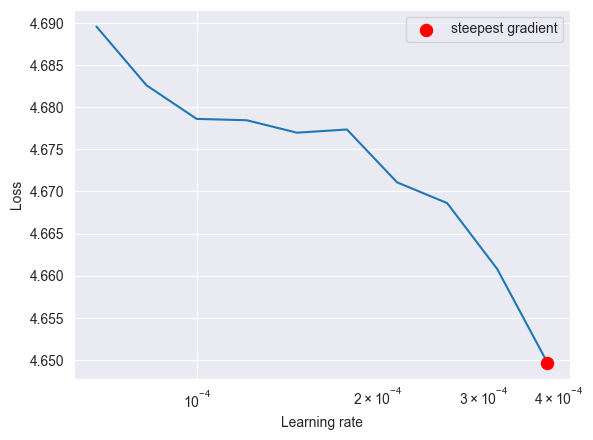

In [110]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.00001)
lr_finder = LRFinder(model_resnet, optimizer, criterion, device="cpu")
lr_finder.range_test(train_loader, end_lr=0.001, num_iter=25)
lr_finder.plot()
lr_finder.reset()

In [111]:
cuda = False  # 设置为 False 表示使用 CPU
epochs = 20

model_name = 'D:\\mysask\\AI\\food-101\\my_model_resnet50.pt'
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=4e-5, weight_decay=0.001)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1,
                                                       patience=1, verbose=True)

writer = SummaryWriter()  # 用于 Tensorboard
early_stop_count = 0
ES_patience = 4
best = 0.0

# 定义 device
device = torch.device("cuda" if cuda else "cpu")
model_resnet.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [114]:
# training the model
for epoch in range(epochs):
    
    # Training
    model_resnet.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc='Training', position=0, leave=True)
    for i,(inp,lbl) in enumerate(tbar):
        optimizer.zero_grad()
        if cuda:
            inp, lbl = inp.cuda(), lbl.cuda()
        out = model_resnet(inp)
        loss = criterion(out,lbl)
        train_loss += loss
        out = out.argmax(dim=1)
        correct += (out == lbl).sum().item()
        loss.backward()
        optimizer.step()
        tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
    train_acc = 100.0*correct/len(train_loader.dataset)
    train_loss /= (len(train_loader.dataset)/batch_size)

    # Validation
    model_resnet.eval()
    with torch.no_grad():
        correct = 0
        val_loss = 0.0
        vbar = tqdm(test_loader, desc='Validation', position=0, leave=True)
        for i,(inp,lbl) in enumerate(vbar):
            if cuda:
                inp, lbl = inp.cuda(), lbl.cuda()
            out = model_resnet(inp)
            val_loss += criterion(out,lbl)
            out = out.argmax(dim=1)
            correct += (out == lbl).sum().item()
        val_acc = 100.0*correct/len(test_loader.dataset)
        val_loss /= (len(test_loader.dataset)/batch_size)
    print(f'\nEpoch: {epoch+1}/{epochs}')
    print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

    scheduler.step(val_loss)

    # Write to tensorboard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val", val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val", val_acc, epoch)

    if val_acc > best:
        best = val_acc
        torch.save(model_resnet, model_name)
        early_stop_count = 0
        print('Validation Accuracy Improved, model saved.\n')
    else:
        early_stop_count += 1

    if early_stop_count == ES_patience:
        print('Early Stopping Initiated...')
        print(f'Best Validation Accuracy achieved: {best:.2f}% at epoch:{epoch-ES_patience}')
        print(f'Model saved as {model_name}')
        break
    writer.flush()

Validation: 100%|██████████| 395/395 [16:41<00:00,  2.54s/it]



Epoch: 1/20
Train loss: 0.37888967990875244, Train Accuracy: 63.283168316831684
Validation loss: 0.2338515669107437, Validation Accuracy: 75.70297029702971

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_siz

Validation: 100%|██████████| 395/395 [17:15<00:00,  2.62s/it]



Epoch: 2/20
Train loss: 0.2741244435310364, Train Accuracy: 72.13201320132013
Validation loss: 0.20244260132312775, Validation Accuracy: 78.24950495049505

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:02<00:00,  2.44s/it]



Epoch: 3/20
Train loss: 0.22265657782554626, Train Accuracy: 76.9927392739274
Validation loss: 0.18757399916648865, Validation Accuracy: 79.68316831683168

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:05<00:00,  2.44s/it]



Epoch: 4/20
Train loss: 0.1879739910364151, Train Accuracy: 80.48184818481849
Validation loss: 0.17637521028518677, Validation Accuracy: 80.58613861386138

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:05<00:00,  2.44s/it]



Epoch: 5/20
Train loss: 0.16062067449092865, Train Accuracy: 83.21188118811881
Validation loss: 0.1720406413078308, Validation Accuracy: 81.35841584158416

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:03<00:00,  2.44s/it]



Epoch: 6/20
Train loss: 0.14052645862102509, Train Accuracy: 85.2039603960396
Validation loss: 0.1718701273202896, Validation Accuracy: 81.72673267326732

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=

Validation: 100%|██████████| 395/395 [16:00<00:00,  2.43s/it]



Epoch: 7/20
Train loss: 0.12280744314193726, Train Accuracy: 87.12871287128714
Validation loss: 0.17584852874279022, Validation Accuracy: 81.2039603960396



Validation: 100%|██████████| 395/395 [10:12<00:00,  1.55s/it]



Epoch: 8/20
Train loss: 0.10783657431602478, Train Accuracy: 88.609900990099
Validation loss: 0.17466117441654205, Validation Accuracy: 81.2910891089109



Validation: 100%|██████████| 395/395 [16:28<00:00,  2.50s/it]



Epoch: 9/20
Train loss: 0.07344531267881393, Train Accuracy: 92.75775577557756
Validation loss: 0.15494130551815033, Validation Accuracy: 83.31485148514851

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_siz

Validation: 100%|██████████| 395/395 [16:58<00:00,  2.58s/it]



Epoch: 10/20
Train loss: 0.06338872015476227, Train Accuracy: 94.0013201320132
Validation loss: 0.15499481558799744, Validation Accuracy: 83.18811881188118



Validation: 100%|██████████| 395/395 [11:19<00:00,  1.72s/it]



Epoch: 11/20
Train loss: 0.05867968127131462, Train Accuracy: 94.51617161716172
Validation loss: 0.1541326344013214, Validation Accuracy: 83.45742574257426

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_siz

Validation: 100%|██████████| 395/395 [16:00<00:00,  2.43s/it]



Epoch: 12/20
Train loss: 0.054953742772340775, Train Accuracy: 94.91749174917491
Validation loss: 0.15440137684345245, Validation Accuracy: 83.38613861386139



Validation: 100%|██████████| 395/395 [10:17<00:00,  1.56s/it]



Epoch: 13/20
Train loss: 0.050475794821977615, Train Accuracy: 95.4943894389439
Validation loss: 0.15431377291679382, Validation Accuracy: 83.48514851485149

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_si

Validation: 100%|██████████| 395/395 [10:23<00:00,  1.58s/it]



Epoch: 14/20
Train loss: 0.047573503106832504, Train Accuracy: 95.84554455445544
Validation loss: 0.15410350263118744, Validation Accuracy: 83.42574257425743



Validation: 100%|██████████| 395/395 [10:18<00:00,  1.57s/it]



Epoch: 15/20
Train loss: 0.04712006822228432, Train Accuracy: 95.82046204620463
Validation loss: 0.15451651811599731, Validation Accuracy: 83.37029702970297



Validation: 100%|██████████| 395/395 [10:19<00:00,  1.57s/it]



Epoch: 16/20
Train loss: 0.04660891368985176, Train Accuracy: 95.87062706270628
Validation loss: 0.15379980206489563, Validation Accuracy: 83.58811881188119

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_si

Validation: 100%|██████████| 395/395 [13:31<00:00,  2.05s/it]



Epoch: 17/20
Train loss: 0.04575023427605629, Train Accuracy: 96.06996699669968
Validation loss: 0.1538352370262146, Validation Accuracy: 83.47722772277228



Validation: 100%|██████████| 395/395 [14:28<00:00,  2.20s/it]



Epoch: 18/20
Train loss: 0.045444998890161514, Train Accuracy: 96.05676567656765
Validation loss: 0.15432332456111908, Validation Accuracy: 83.55247524752475



Validation: 100%|██████████| 395/395 [13:54<00:00,  2.11s/it]



Epoch: 19/20
Train loss: 0.044805098325014114, Train Accuracy: 96.18217821782179
Validation loss: 0.15325108170509338, Validation Accuracy: 83.59603960396039

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_s

Validation: 100%|██████████| 395/395 [12:47<00:00,  1.94s/it]


Epoch: 20/20
Train loss: 0.04480086639523506, Train Accuracy: 96.16501650165017
Validation loss: 0.153484508395195, Validation Accuracy: 83.46534653465346



In [115]:
import torch

# 加载模型
model_path = "d:\\mysask\\AI\\food-101\\my_model_resnet50.pt"  # 替换为实际的文件路径
model_resnet = torch.load(model_path, weights_only=False)

# 现在您可以使用 model_resnet 进行预测或继续训练
model_resnet.eval()  # 设置为评估模式


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
import torch
from torchvision import transforms
from PIL import Image

# 加载模型（使用你提到的方式）
model_path = 'D:\\mysask\\AI\\food-101\\my_model_resnet50.pt'
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
model.eval()

# 定义一个函数加载类别名称（假设每行是一个类别名称）
def load_class_names(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        class_names = [line.strip() for line in f if line.strip()]
    return class_names

# 加载所有类别名称（101 个类别）
class_names = load_class_names('D:\\mysask\\AI\\food-101\\food-101\\meta\\classes.txt')

# 定义图像预处理流程（与训练时保持一致）
preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 加载一张测试图片
img_path = 'D:\\2031.jpg'
img = Image.open(img_path).convert('RGB')
img_tensor = preprocess(img).unsqueeze(0)  # 添加 batch 维度

# 模型推理
with torch.no_grad():
    output = model(img_tensor)
    # 获取预测的类别索引
    _, pred = torch.max(output, 1)

# 根据索引获取对应的类别名称
predicted_class = class_names[pred.item()]
print("预测类别:", predicted_class)


预测类别: red_velvet_cake
